<a href="https://colab.research.google.com/github/Agwora/Agwora/blob/main/spamNotspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data=pd.read_csv(r"sample_data/email.csv")
Data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
Data.Category.value_counts()

,count
Category,
ham,4825
spam,747
"{""mode"":""full""",1


In [ ]:
forPlot=Data.Category.value_counts()


In [ ]:
type(forPlot)

pandas.core.series.Series

In [ ]:
forPlot.drop('{"mode":"full"',axis=0,inplace=True)

<Axes: xlabel='Category'>

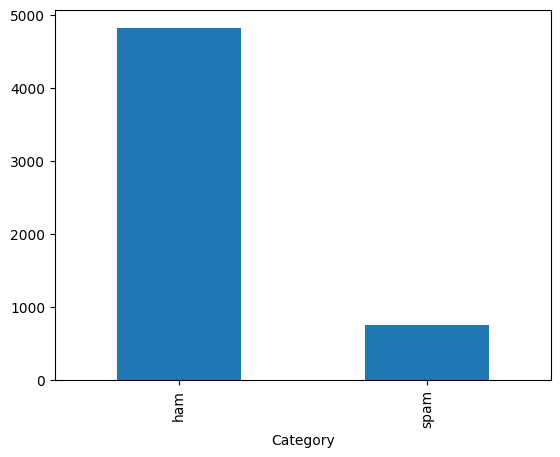

In [ ]:
forPlot.plot(kind='bar')

Creating a new column with values of 1 spam,0 not spam.**bold text**

In [ ]:
lst1=[]
for i in Data['Category']:
  if i=='spam':
    lst1.append(1)
  else:
    lst1.append(0)

In [ ]:
Data['category']=lst1

In [ ]:
Data.head()

,Category,Message,category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
Data.drop('Category',axis=1,inplace=True)

In [ ]:
Data.head()

,Message,category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
import re

In [ ]:
#Function to clean text
def clean_text(text):
  newtextlst=[]
  for i in text:
    newtext=re.sub('[^a-zA-Z]',' ',i)
    newtext=newtext.lower()
    newtextlst.append(newtext)
  return newtextlst

In [ ]:
Data['message']=clean_text(Data['Message'])
Data.head()

,Message,category,message
0,"Go until jurong point, crazy.. Available only ...",0,go until jurong point crazy available only ...
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah i don t think he goes to usf he lives aro...


In [ ]:
Data.drop('Message',axis=1,inplace=True)
Data.head()

,category,message
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...


In [ ]:
import sklearn
sklearn.__version__

'1.7.2'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectoeizer=CountVectorizer(stop_words='english')

In [ ]:
#Fit andTransform the text
X=vectoeizer.fit_transform(Data['message'])


In [ ]:
# Converting to data frame
text_features=pd.DataFrame(X.toarray(),columns=vectoeizer.get_feature_names_out())

In [ ]:
text_features.head()

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
text_features.shape

(5573, 7492)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
XData=text_features
y=Data['category']

In [ ]:
y.head()

,category
0,0
1,0
2,1
3,0
4,0


In [ ]:
x_train,x_test,y_train, y_test=train_test_split(XData,y,random_state=0,test_size=0.3)

In [ ]:
model=make_pipeline(LogisticRegression())
model.fit(x_train,y_train)

,steps,"[('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None


In [ ]:
model.score(x_test,y_test)

0.979066985645933

In [ ]:
# predicting
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_Score=accuracy_score(y_test,y_pred)
accuracy_Score

0.979066985645933

In [ ]:
# testing
[Data['category'][430:450]]

[430    0
 431    0
 432    0
 433    1
 434    0
 435    0
 436    0
 437    0
 438    0
 439    0
 440    0
 441    0
 442    0
 443    0
 444    0
 445    0
 446    0
 447    0
 448    0
 449    0
 Name: category, dtype: int64]

In [ ]:
text_features[:][430:450]

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
input1=text_features[:][430:450]

In [ ]:
model.predict(input1)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# **using a different vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

In [ ]:
Data.head()

,category,message
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...


In [ ]:
# Text cleaning function
def clean_text(text):
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
Data['new_message'] = Data['message'].apply(clean_text)
Data.head()

,category,message,new_message
0,0,go until jurong point crazy available only ...,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...,nah i don t think he goes to usf he lives arou...


In [ ]:
Data.drop('message',axis=1,inplace=True)

In [ ]:
Data.head()

,category,new_message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives arou...


In [119]:
X=Data['new_message']
y=Data['category']

In [120]:
#spliting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [126]:
#Building the model

pipe=Pipeline([('vect',TfidfVectorizer(stop_words='english')),('clf',LogisticRegression())])

In [122]:
len(y_test)

1672

In [118]:
try:
  if len(x_train)!=len(y_train):
    print('Data lenght differences')
  else:
    print('len okay')
except Exception as e:
  print(e)

len okay


In [127]:
pipe.fit(x_train,y_train)

,steps,"[('vect', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [131]:
# MAking  predictions
y_pred1=pipe.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [132]:
accuracy=accuracy_score(y_test,y_pred1)
accuracy

0.9557416267942583

In [133]:
confusion_matrix=confusion_matrix(y_test,y_pred1)
confusion_matrix

array([[1444,    5],
       [  69,  154]])

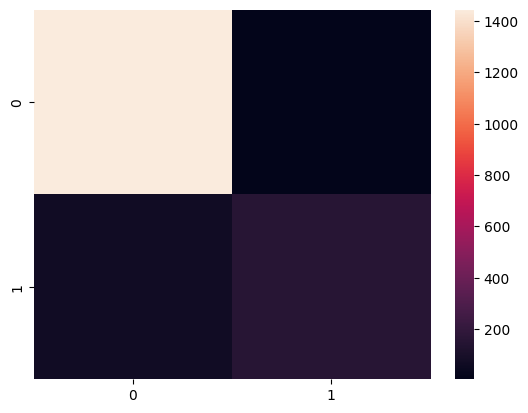

In [134]:
sns.heatmap(confusion_matrix)
sns.set_style('whitegrid')
sns.set_context('talk')

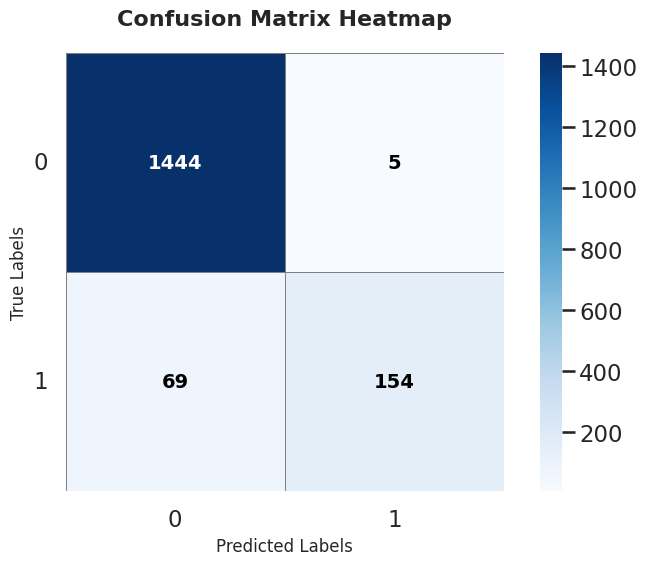

In [137]:

import matplotlib.pyplot as plt
import numpy as np

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix,
                      # Display numbers in cells
            fmt='d',              # Format as integers
            cmap='Blues',         # Color scheme
            cbar=True,            # Show color bar
            square=True,          # Make cells square
            linewidths=0.5,       # Add lines between cells
            linecolor='gray')     # Line color

# Add labels and title
plt.title('Confusion Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Set custom tick labels (assuming binary classification: 0=Negative, 1=Positive)
class_names = ['0', '1']  # Change these to match your labels (e.g., ['Ham', 'Spam'])
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names, rotation=0)

# Add value annotations with better formatting
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, confusion_matrix[i, j],
                 ha='center', va='center',
                 fontweight='bold', fontsize=14,
                 color='white' if confusion_matrix[i, j] > confusion_matrix.max()/2 else 'black')

plt.tight_layout()
plt.show()